In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [27]:
 #Load the data
data = pd.read_csv('customersdata.csv')


In [28]:
print(data)

    Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
0         2       3  12669   9656     7561     214              2674   
1         2       3   7057   9810     9568    1762              3293   
2         2       3   6353   8808     7684    2405              3516   
3         1       3  13265   1196     4221    6404               507   
4         2       3  22615   5410     7198    3915              1777   
5         2       3   9413   8259     5126     666              1795   
6         2       3  12126   3199     6975     480              3140   
7         2       3   7579   4956     9426    1669              3321   
8         1       3   5963   3648     6192     425              1716   
9         2       3   6006  11093    18881    1159              7425   
10        2       3   3366   5403    12974    4400              5977   
11        2       3  13146   1124     4523    1420               549   
12        2       3  31714  12319    11757     287              

In [30]:
# Check data types
print(data.dtypes)


Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object


In [32]:
# drop channel and region columns as they are not needed for clustering
data.drop(['Channel', 'Region'], axis=1, inplace=True)

In [33]:
print(data.head())

   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0  12669  9656     7561     214              2674        1338
1   7057  9810     9568    1762              3293        1776
2   6353  8808     7684    2405              3516        7844
3  13265  1196     4221    6404               507        1788
4  22615  5410     7198    3915              1777        5185


In [34]:
# Standardize the dataset
scaler = StandardScaler()
scaled_dataset = scaler.fit_transform(data)


In [35]:
x = data.iloc[:, [1, 3]].values  

In [36]:
print(x)

[[ 9656   214]
 [ 9810  1762]
 [ 8808  2405]
 [ 1196  6404]
 [ 5410  3915]
 [ 8259   666]
 [ 3199   480]
 [ 4956  1669]
 [ 3648   425]
 [11093  1159]
 [ 5403  4400]
 [ 1124  1420]
 [12319   287]
 [ 6208  3095]
 [ 9465   294]
 [ 1114   397]
 [ 8816   134]
 [ 6157   839]
 [ 6327  2205]
 [ 2495   669]
 [ 4519  1066]
 [  871  3383]
 [ 1917  9408]
 [36423  5154]]


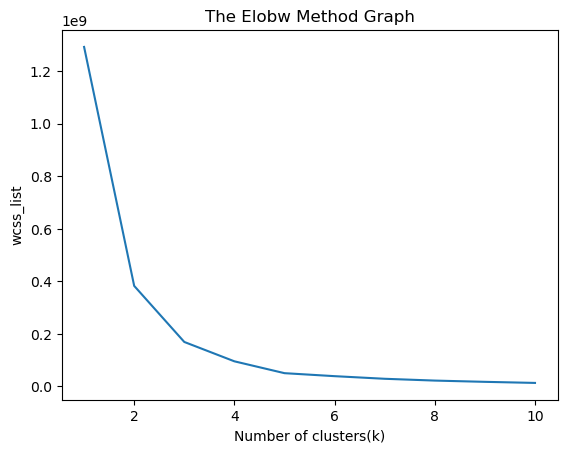

In [37]:
#finding optimal number of clusters using the elbow method  
from sklearn.cluster import KMeans  
wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 0)  
    kmeans.fit(x)  
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss_list)  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()  

In [40]:
# Fit the k-means model to the data
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(x)




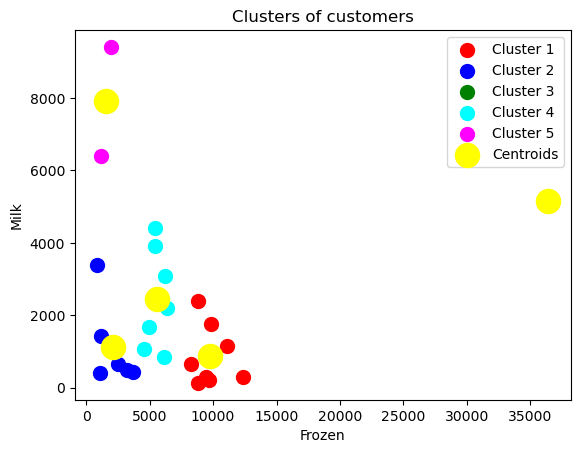

In [41]:
# Plot the results
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Frozen')
plt.ylabel('Milk')
plt.legend()
plt.show()


